In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [21]:
path='/Users/thomas/Documents/Data/esemble 1001-001'
ds=xr.open_mfdataset(path+'/*.nc')
ds

<xarray.Dataset>
Dimensions:      (nj: 384, ni: 320, time: 3012, nc: 5, nkice: 8, nksnow: 3, nkbio: 5, nvertices: 4, d2: 2)
Coordinates:
    TLON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULON         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT         (nj, ni) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time         (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni, nc, nkice, nksnow, nkbio, nvertices, d2
Data variables: (12/21)
    NCAT         (time, nc) float32 dask.array<chunksize=(120, 5), meta=np.ndarray>
    VGRDi        (time, nkice) float32 dask.array<chunksize=(120, 8), meta=np.ndarray>
    VGRDs        (time, nksnow) float32 dask.array<chunksize=(120, 3), meta=np.ndarray>
    VGRDb        (time, nkbio) float32 dask.array<chunksize=(120, 5), meta=np.ndarray>
    tmask        (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
    tarea        (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
    ...           ...
    lont_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    latt_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    lonu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    latu_bounds  (time, nj, ni, nvertices) float32 dask.array<chunksize=(120, 384, 320, 4), meta=np.ndarray>
    time_bounds  (time, d2) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    aice         (time, nj, ni) float32 dask.array<chunksize=(120, 384, 320), meta=np.ndarray>
Attributes:
    title:             b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model (CICE) Version 5
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    comment:           All years have exactly 365 days
    comment2:          File written on model date 18500201
    comment3:          seconds elapsed into model date:      0
    conventions:       CF-1.0
    history:           This dataset was created on 2020-01-31 at 16:34
    io_flavor:         io_pio

In [109]:
aice=ds['aice']
tarea=ds['tarea']
aicet=(aice*tarea)/1e12

In [111]:
import datetime
ds_mean = aicet.sum(dim=['nj', 'ni'])

# Convert this DataArray to a DataFrame
df = ds_mean.to_dataframe(name='aice')
df.reset_index(inplace=True)
# Extract the year and month from the 'time' column
# Extract the year and month from the 'time' column
# Extract the year and month from the 'time' column
df['year'] = [date.year for date in df['time']]
df['month'] = [date.month for date in df['time']]

# Convert numerical months to month names
df['month'] = df['month'].apply(lambda x: pd.Timestamp(datetime.datetime(2000, x, 1)).month_name())
# Create a pivot table with 'year' as rows, 'month' as columns, and mean 'aice' as values
pivot_df = df.pivot('month','year', 'aice')

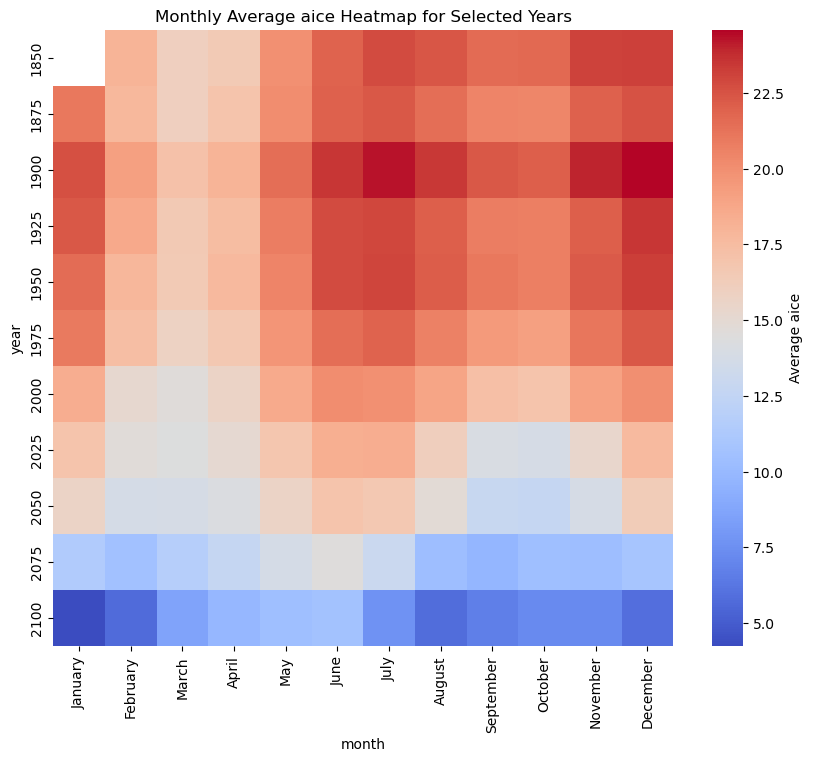

In [113]:
# Convert this DataArray to a DataFrame
df = ds_mean.to_dataframe(name='aice')

# Reset the index so that 'time' becomes a column
df.reset_index(inplace=True)

# Extract the year and month from the 'time' column
df['year'] = [date.year for date in df['time']]
df['month'] = [date.month for date in df['time']]

# Map numeric month to month name
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
              6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
              11: 'November', 12: 'December'}

df['month'] = df['month'].map(month_dict)

# Filter rows for the specified years
selected_years = [1850,1875, 1900,1925, 1950,1975, 2000,2025,2050,2075, 2100]
df = df[df['year'].isin(selected_years)]

# Create a pivot table with 'month' as rows, 'year' as columns, and mean 'aice' as values
pivot_df = df.pivot( 'year','month', 'aice')

# Reorder rows (months) in pivot_df
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pivot_df = pivot_df.reindex(columns=months)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='coolwarm', cbar_kws={'label': 'Average aice'})

plt.title("Monthly Average aice Heatmap for Selected Years")
plt.show()


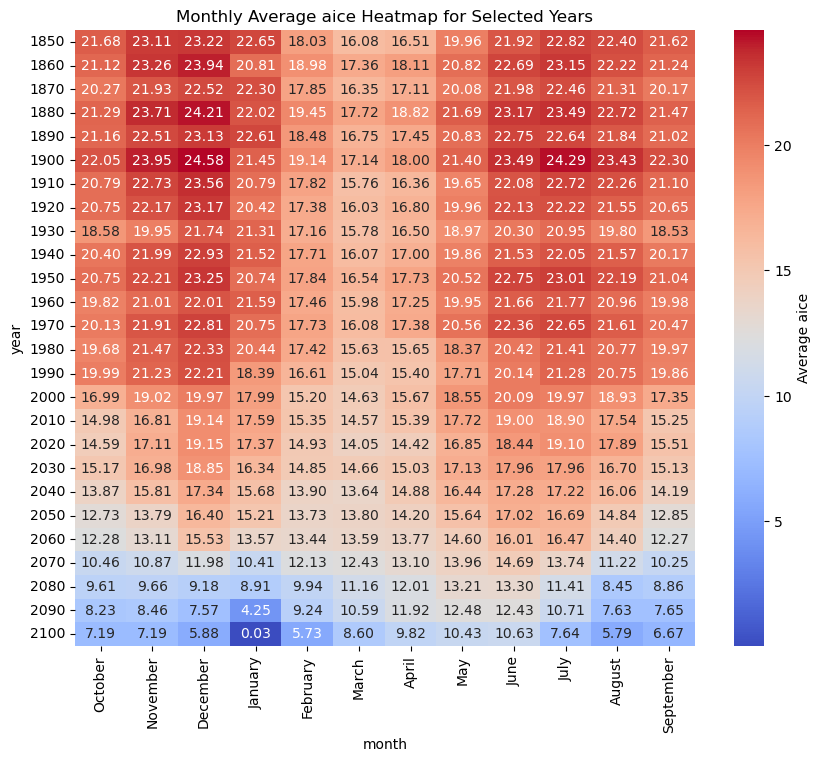

In [114]:
# Convert this DataArray to a DataFrame
df = ds_mean.to_dataframe(name='aice')

# Reset the index so that 'time' becomes a column
df.reset_index(inplace=True)

# Extract the year and month from the 'time' column
df['year'] = [date.year for date in df['time']]
df['month'] = [date.month for date in df['time']]

# Map numeric month to month name
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
              6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
              11: 'November', 12: 'December'}

df['month'] = df['month'].map(month_dict)

# Define custom sorting order for the months
custom_order = ['October', 'November', 'December', 'January', 'February', 'March',
                'April', 'May', 'June', 'July', 'August', 'September']

# Convert 'month' to categorical data type with custom order
df['month'] = pd.Categorical(df['month'], categories=custom_order, ordered=True)
#df[(df['year'] == 2101) & (df['month'] == 'January')]['aice']
# Filter rows for the specified years
selected_years = np.arange(1850,2101,10)
df = df[df['year'].isin(selected_years)]

# Create a pivot table with 'year' as rows, 'month' as columns, and mean 'aice' as values
pivot_df = df.pivot('year', 'month', 'aice')

# Reorder columns (months) in pivot_df
pivot_df = pivot_df[custom_order]
pivot_df['January'] = pivot_df['January'].shift(-1)
pivot_df.loc[2100,'January']=0.025289

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df,annot=True,fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average aice'})

plt.title("Monthly Average aice Heatmap for Selected Years")
plt.show()

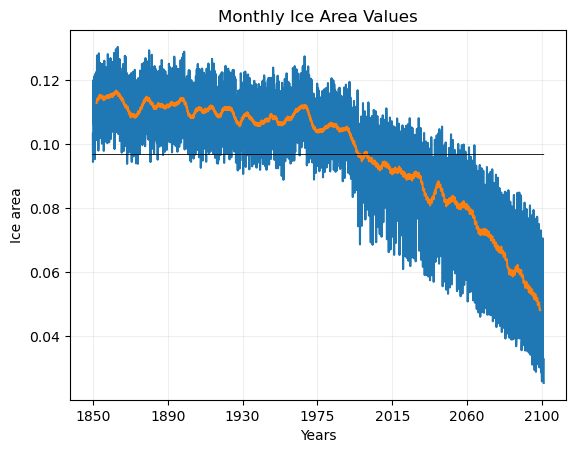

In [4]:
fig,ax=plt.subplots()
ax.plot(aice.mean(('nj','ni')))
ax.plot(aice.mean(('nj','ni')).rolling(time=50, center=True).mean())
ax.plot(np.full_like(aice.mean(('nj','ni')), aice.mean(('nj','ni')).mean()), color='black',linewidth=0.6)
ax.set_xticks(np.arange(0,3001, 500), ['1850', '1890','1930','1975', '2015','2060', '2100'], label='smooth')
ax.set_ylabel('Ice area')
ax.set_xlabel('Years')
ax.set_title('Monthly Ice Area Values')
plt.grid(alpha=0.2)
#plt.legend()
plt.savefig('Global.jpg', )
plt.show()


In [5]:
aice.mean(('nj','ni'))[3000]

<xarray.DataArray 'aice' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     object 2100-02-01 00:00:00

In [6]:
# Define the region boundaries (replace these with your desired region)
lat_min, lat_max = 50, 61
lon_min, lon_max = 295, 305

# Create a mask for the region of interest
mask = ((aice.TLAT >= lat_min) & (aice.TLAT <= lat_max) &
        (aice.TLON >= lon_min) & (aice.TLON <= lon_max))

# Apply the mask to the aice variable
aice_labrador =aice.where(mask, drop=True)
aice_labrador

<xarray.DataArray 'aice' (time: 3012, nj: 29, ni: 12)>
dask.array<where, shape=(3012, 29, 12), dtype=float32, chunksize=(120, 29, 12), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
    ULON     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
    ULAT     (nj, ni) float32 dask.array<chunksize=(29, 12), meta=np.ndarray>
  * time     (time) object 1850-02-01 00:00:00 ... 2101-01-01 00:00:00
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      ice area  (aggregate)
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

In [7]:
aice_labrador_mean=aice_labrador.mean(('nj','ni'))
aice_labrador_rollmean=aice_labrador_mean.rolling(time=100, center=True).mean()

In [8]:
aice_labrador_mean[2880]

<xarray.DataArray 'aice' ()>
dask.array<getitem, shape=(), dtype=float32, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     object 2090-02-01 00:00:00

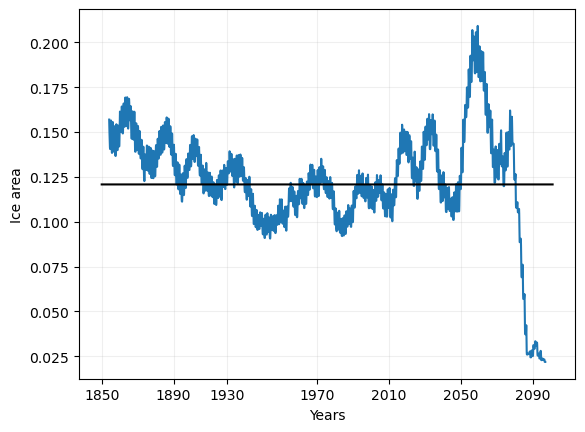

In [9]:
fig,ax=plt.subplots()
#ax.plot(aice_labrador_mean)
ax.plot(aice_labrador_rollmean)
ax.plot(np.full_like(aice_labrador_mean,aice_labrador_mean.mean()), color='black')
ax.set_xticks([0,480,840, 1440,1920,2400,2880], ['1850', '1890','1930','1970','2010','2050','2090'])
ax.set_ylabel('Ice area')
ax.set_xlabel('Years')
#ax.set_title('Monthly Ice Area')
plt.grid(alpha=0.2)
plt.show()

In [10]:
#Personal notes
#next to do probably next week(busy this week)
#panarctic region
#baffin bay
#try different essembles
#salt csm

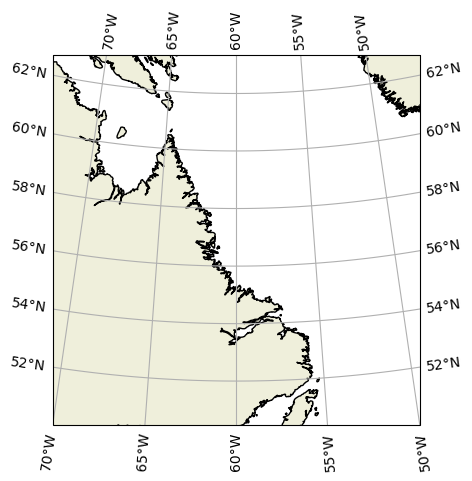

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
x0, x1, y0, y1 = -70,-50,50,63
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
proj = ccrs.AlbersEqualArea(central_longitude=c_lon,
                            central_latitude=c_lat,
                            standard_parallels=(y0, y1))
ax = plt.axes(projection=proj)    
ax.set_extent([x0, x1, y0, y1], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.gridlines(draw_labels=True)
# Make a boundary path in PlateCarree projection, I choose to start in
# the bottom left and go round anticlockwise, creating a boundary point
# every 1 degree so that the result is smooth:


plt.show()


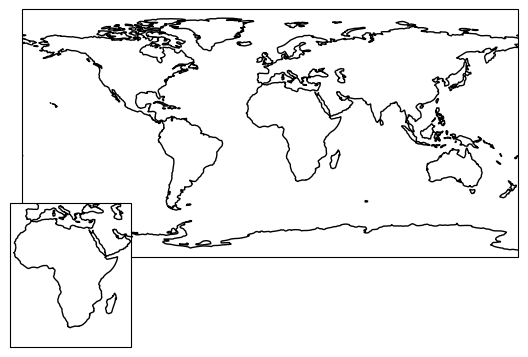

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
fig = plt.figure()

# Add a global map to the figure
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()

# Add a smaller map of Africa at the bottom-left corner within the global map
# The extent for Africa in PlateCarree projection is roughly (-20, 60, -40, 40)
# The position and size of the axes is specified by the list [left, bottom, width, height]
# These values are adjusted to place the smaller plot within the boundaries of the global map
ax2 = fig.add_axes([0.05, 0.05, 0.3, 0.3], projection=ccrs.PlateCarree())
ax2.set_extent([-20, 60, -40, 40])
ax2.coastlines()

# Show the figure
plt.show()


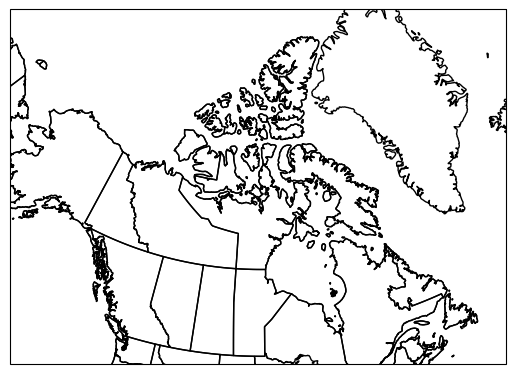

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import ConnectionPatch
import cartopy.crs as ccrs

# Create a new figure
fig = plt.figure()

# Add a large map of Africa to the figure
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax1.set_extent([-141, -52, 40, 84])
ax1.coastlines()
ax1.add_feature(cfeature.STATES.with_scale('50m'))
# Add a smaller global map at the bottom-left corner within the Africa map
# The position and size of the axes is specified by the list [left, bottom, width, height]


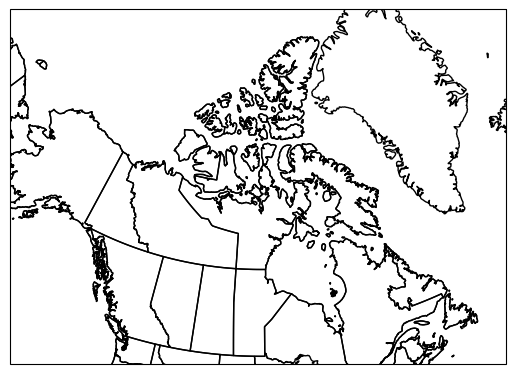

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Create a new figure
fig = plt.figure()

# Add a large map of Canada to the figure
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax1.set_extent([-141, -52, 40, 84])
ax1.coastlines()
ax1.add_feature(cfeature.STATES.with_scale('50m'))

# Define the coordinates for Labrador and Newfoundland
labrador_coords = [
    (-65.114, 51.5511),  # Bottom left corner
    (-65.114, 60.436),   # Top left corner
    (-52.6363, 60.436),  # Top right corner
    (-52.6363, 51.5511), # Bottom right corner
    (-65.114, 51.5511)   # Bottom left corner (closing the shape)
]

newfoundland_coords = [
    (-60.6791, 46.6184),  # Bottom left corner
    (-60.6791, 51.6795),  # Top left corner
    (-52.6363, 51.6795),  # Top right corner
    (-52.6363, 46.6184),  # Bottom right corner
    (-60.6791, 46.6184)   # Bottom left corner (closing the shape)
]

# Create patches for Labrador and Newfoundland
labrador_patch = mpatches.Polygon(labrador_coords, closed=True, facecolor='red', alpha=0.5)
newfoundland_patch = mpatches.Polygon(newfoundland_coords, closed=True, facecolor='blue', alpha=0.5)

# Add the patches to the plot
ax1.add_patch(labrador_patch)
ax1.add_patch(newfoundland_patch)

# Show the plot
plt.show()


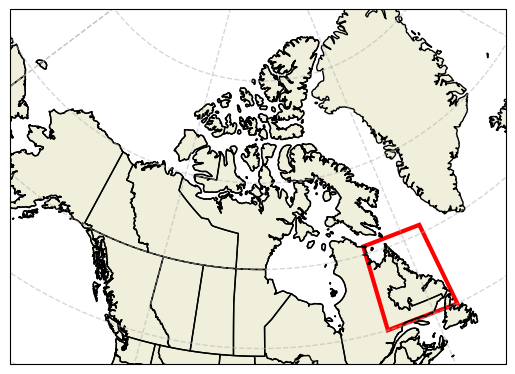

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import ConnectionPatch
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a new figure
fig = plt.figure()

# Add a large map of Africa to the figure
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax1.set_extent([-141, -52, 40, 84])
ax1.coastlines()
ax1.add_feature(cfeature.STATES.with_scale('50m'))
ax1.add_feature(cfeature.LAND)


ax1.gridlines(draw_labels=False, linewidth=1, alpha=0.5, linestyle='--')
ax1.add_patch(mpatches.Rectangle(xy=[-70, 50], width=15, height=11, linewidth=3,
                                facecolor='none', edgecolor='red',
                                transform=ccrs.PlateCarree()))


# Show the plot
plt.show()


In [1]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex

# Get the Viridis colormap
cmap = get_cmap('viridis')

# Get the colors in the Viridis colormap
colors = cmap.colors

# Convert the colors to hex codes
hex_codes = [rgb2hex(color) for color in colors]
a=np.array(hex_codes)
a.shape

NameError: name 'np' is not defined

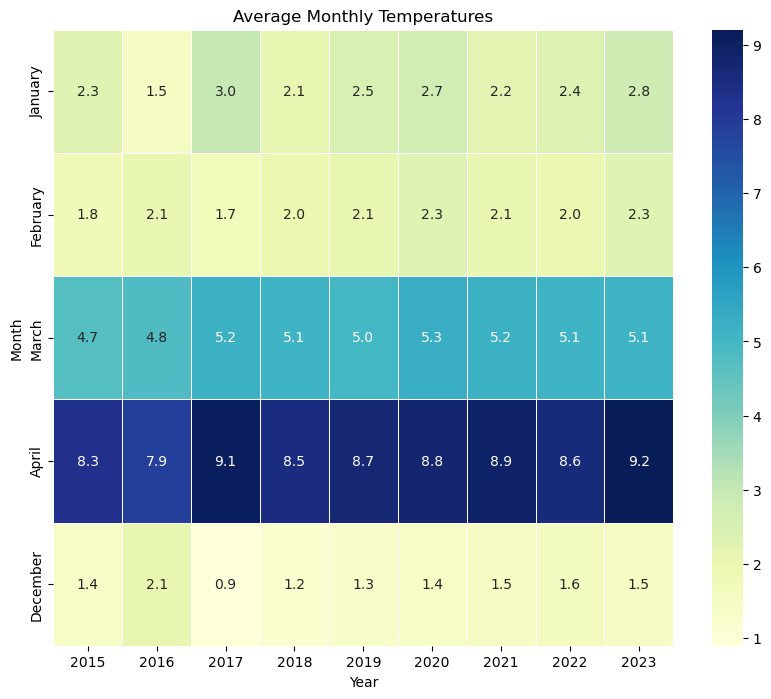

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "January": [2.3, 1.5, 3.0, 2.1, 2.5, 2.7, 2.2, 2.4, 2.8],
    "February": [1.8, 2.1, 1.7, 2.0, 2.1, 2.3, 2.1, 2.0, 2.3],
    "March": [4.7, 4.8, 5.2, 5.1, 5.0, 5.3, 5.2, 5.1, 5.1],
    "April": [8.3, 7.9, 9.1, 8.5, 8.7, 8.8, 8.9, 8.6, 9.2],
    # Add other months here...
    "December": [1.4, 2.1, 0.9, 1.2, 1.3, 1.4, 1.5, 1.6, 1.5],
}

df = pd.DataFrame(data).set_index('Year')

# Transpose the dataframe so that months are the rows (Y-axis) and years are the columns (X-axis)
df = df.transpose()

plt.figure(figsize=(10,8))
sns.heatmap(df, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Monthly Temperatures')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


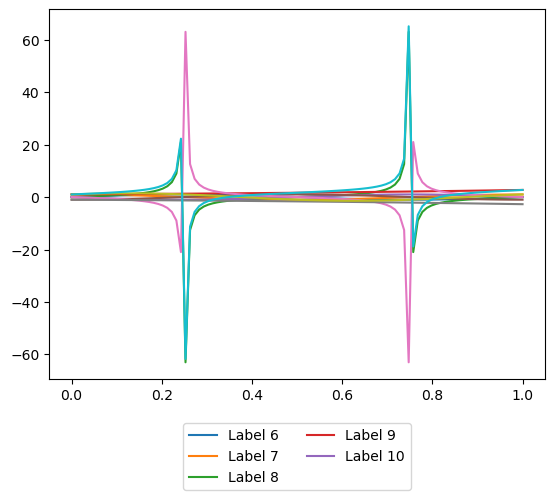

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
x = np.linspace(0, 1, 100)
y1 = np.sin(2*np.pi*x)
y2 = np.cos(2*np.pi*x)
y3 = np.tan(2*np.pi*x)
y4 = np.exp(x)

# Plot the data
fig, ax = plt.subplots()
ax.plot(x, y1, label='Label 1')
ax.plot(x, y2, label='Label 2')
ax.plot(x, y3, label='Label 3')
ax.plot(x, y4, label='Label 4')
ax.plot(x, -y1, label='Label 5')
ax.plot(x, -y2, label='Label 6')
ax.plot(x, -y3, label='Label 7')
ax.plot(x, -y4, label='Label 8')
ax.plot(x, y1 + y2, label='Label 9')
ax.plot(x, y3 + y4, label='Label 10')

# Create a legend with two columns
num_labels = 10
num_columns = 2

# Calculate the number of rows required
num_rows = (num_labels + num_columns - 1) // num_columns

# Split the labels into multiple lists based on the number of columns
labels = [f'Label {i+1}' for i in range(num_labels)]
split_labels = [labels[i:i + num_rows] for i in range(0, num_labels, num_rows)]

# Create and add multiple legends
for split_label in split_labels:
    ax.legend(split_label, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_columns)

plt.show()


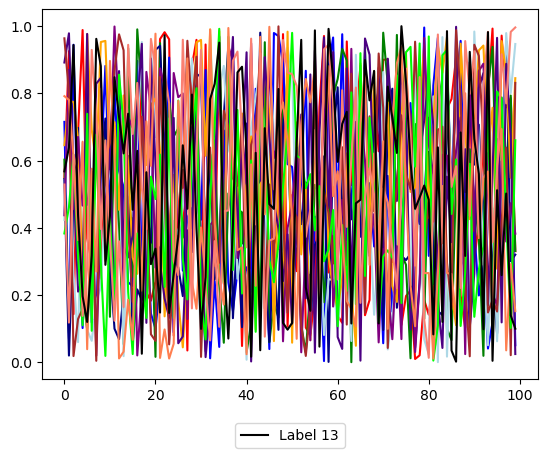

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create some sample data
np.random.seed(0)
data = np.random.rand(100, 13)

# Generate labels and colors for each plot
labels = ['Label {}'.format(i + 1) for i in range(13)]
colors = ['red', 'blue', 'green', 'navy', 'lightblue', 'orange', 'purple', 'indigo', 'brown', 'lime', 'coral', 'salmon', 'black']

# Plot the data
fig, ax = plt.subplots()
lines = []
for i in range(13):
    line, = ax.plot(data[:, i], color=colors[i])
    lines.append(line)

# Create a legend with multiple columns
num_labels = 13
num_columns = 3

# Split the labels into multiple lists based on the number of columns
split_labels = [labels[i:i + num_columns] for i in range(0, num_labels, num_columns)]

# Create and add multiple legends
legends = []
for split_label in split_labels:
    legend = ax.legend([lines[i] for i in range(num_labels) if labels[i] in split_label],
                       split_label, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=num_columns)
    legends.append(legend)

# Manually adjust the spacing between the legends
plt.subplots_adjust(hspace=0.3)

plt.show()

In [ ]:
# Create a figure with subplots
x0, x1, y0, y1 = -68,-54,50,61
# Calculate the central longitude and latitude
c_lon = (x0 + x1) / 2
c_lat = (y0 + y1) / 2
fig, axs = plt.subplots(4, 7, figsize=(20, 13), subplot_kw={'projection':ccrs.AlbersEqualArea(central_longitude=c_lon,
                                                                                central_latitude=c_lat,
                                                                                standard_parallels=(y0, y1))})
data=selected_data
# Calculate the global minimum and maximum values
global_min = np.min([np.min(data.mean('time').values) for data in selected_data])
global_max = np.max([np.max(data.mean('time').values) for data in selected_data])

# Create a colormap and normalization based on the global range
#cmap = plt.cm.vir
normalizer = plt.Normalize(vmin=global_min, vmax=global_max)
cb=cm.ScalarMappable(norm=normalizer)
# Plot each data on its respective subplot
for i, ax in enumerate(axs.flat):
    if i < 26:
        data = selected_data[i].mean('time')
        ax.contourf(data.TLON, data.TLAT, data, levels=45, cmap='viridis', norm=normalizer, transform=ccrs.PlateCarree())
        ax.set_title(titles[i])
        ax.coastlines()

# Add a colorbar that represents the global range
cbar = fig.colorbar(cb, ax=axs.ravel().tolist(), orientation='vertical', pad=0.05)
cbar.set_label('Data')

for i in range(26,28):
    fig.delaxes(axs.flat[i])

# Adjust the spacing between subplots
#fig.subplots_adjust(hspace=0.3, wspace=0.2)

# Show the figure
plt.show()
for i in selected_data:
    print(np.min(i.max('time').values))